# Gradient descent

In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [130]:
def g(x,y):
    return x**2 +  y**2 - 2*x*y
def gdx(x,y):
    return 2*x - 2*y
def gdy(x,y):
    return 2*y - 2*x
def h(x,y):
    return x*np.exp(-x**2-y**2)
def hdx(x,y):
    return np.exp(-x**2-y**2)-2*x**2*np.exp(-x**2-y**2)
def hdy(x,y):
    return -2*x*y*np.exp(-x**2-y**2)

# Plots for g(x) and h(x)

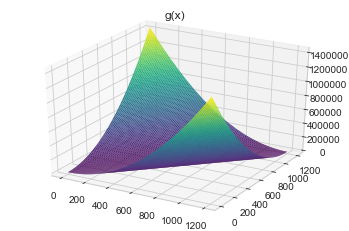

In [131]:
x = np.linspace(0, 1200, 600)
y = np.linspace(0, 1200, 600)
X, Y = np.meshgrid(x, y)
Z = g(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=5, cstride=5,
                cmap='viridis')
plt.title('g(x)')

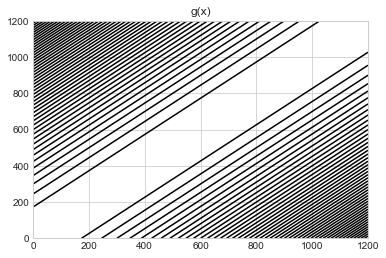

In [132]:
plt.contour(X, Y, Z,50, colors='black');
plt.title('g(x)')

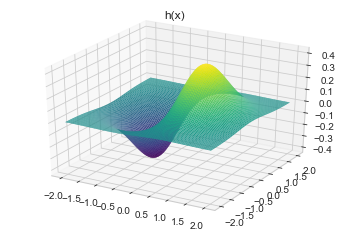

In [133]:
x = np.linspace(-2.0, 2.0, 100)
y = np.linspace(-2.0, 2.0, 100)

X, Y = np.meshgrid(x, y)
Z = h(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis')
plt.title('h(x)')

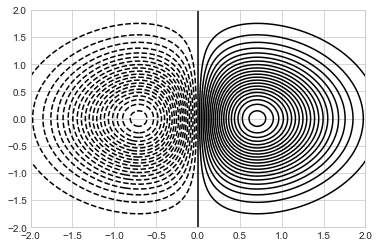

In [134]:
plt.contour(X, Y, Z,50, colors='black');

In [135]:
def grad_descent_update(x0,y0,g,gdx,gdy,rate=1.0):
    while g(x0 - rate*gdx(x0,y0),y0 - rate*gdy(x0,y0)) > g(x0,y0):
        rate = rate/2    
    return [x0 - rate*gdx(x0,y0),y0 - rate*gdy(x0,y0)]

# Results for g(x)

In [136]:
x0,y0 = 820.0,530.0
condition = True
loops = 1
max_iter = 20
info = [(x0,y0)]
while condition and loops<max_iter: 
    [x1,y1] = grad_descent_update(x0,y0,g,gdx,gdy,10.0)
    loops += 1
    condition = (np.abs(x0-x1)+np.abs(y0-y1)) >= 0.0001
    x0 = x1
    y0 = y1
    info.append((x0,y0))
    print('x =',x0,'y =',y0)
    
if loops == max_iter:
    print('Solution failed to converge. Try another starting value!')

x = 638.75 y = 711.25
x = 684.0625 y = 665.9375
x = 672.734375 y = 677.265625
x = 675.56640625 y = 674.43359375
x = 674.8583984375 y = 675.1416015625
x = 675.035400390625 y = 674.964599609375
x = 674.9911499023438 y = 675.0088500976562
x = 675.0022125244141 y = 674.9977874755859
x = 674.9994468688965 y = 675.0005531311035
x = 675.0001382827759 y = 674.9998617172241
x = 674.999965429306 y = 675.000034570694
x = 675.0000086426735 y = 674.9999913573265


# Results for h(x)

In [137]:
x0,y0 = -2,-2
condition = True
loops = 1
max_iter = 20
while condition and loops<max_iter: 
    [x1,y1] = grad_descent_update(x0,y0,h,hdx,hdy,10.0)
    loops += 1
    condition = (np.abs(x0-x1)+np.abs(y0-y1)) >= 0.0001
    x0 = x1
    y0 = y1
    print('x =',round(x0,3),'y =',round(y0,3))
    
if loops == max_iter:
    print('Solution failed to converge. Try another starting value!')

x = -1.977 y = -1.973
x = -1.949 y = -1.941
x = -1.914 y = -1.902
x = -1.871 y = -1.852
x = -1.812 y = -1.784
x = -1.726 y = -1.684
x = -1.578 y = -1.51
x = -1.24 y = -1.106
x = -0.584 y = -0.239
x = -0.851 y = -0.005
x = -0.579 y = 0.0
x = -0.726 y = 0.0
x = -0.706 y = 0.0
x = -0.707 y = 0.0
x = -0.707 y = 0.0


# Gradient Ascent results for h(x)

In [138]:
def grad_ascent_update(x0,y0,g,gdx,gdy,rate=1.0):
    while g(x0 + rate*gdx(x0,y0),y0 + rate*gdy(x0,y0)) < g(x0,y0):
        rate = rate/2    
    return [x0 + rate*gdx(x0,y0),y0 + rate*gdy(x0,y0)]

In [139]:
x0,y0 = 2,2
condition = True
loops = 1
max_iter = 20
while condition and loops<max_iter: 
    [x1,y1] = grad_ascent_update(x0,y0,h,hdx,hdy,10.0)
    loops += 1
    condition = (np.abs(x0-x1)+np.abs(y0-y1)) >= 0.0001
    x0 = x1
    y0 = y1
    print('x =',round(x0,3),'y =',round(y0,3))
    
if loops == max_iter:
    print('Solution failed to converge. Try another starting value!')

x = 1.977 y = 1.973
x = 1.949 y = 1.941
x = 1.914 y = 1.902
x = 1.871 y = 1.852
x = 1.812 y = 1.784
x = 1.726 y = 1.684
x = 1.578 y = 1.51
x = 1.24 y = 1.106
x = 0.584 y = 0.239
x = 0.851 y = 0.005
x = 0.579 y = -0.0
x = 0.726 y = -0.0
x = 0.706 y = -0.0
x = 0.707 y = -0.0
x = 0.707 y = -0.0


# Gradient Descent (vectorized form)

In [112]:
def gVec(x0Vec):
    x = x0Vec[0]
    y = x0Vec[1]
    return x**2 +  y**2 - 2*x*y

In [140]:
def grad(x0Vec):
    x,y = x0Vec[0:]
    return np.array([2*x - 2*y, 2*y - 2*x])

In [109]:
def grad_descent_updateVec(x0Vec,gVec,grad):
    rate = 10
    while gVec(x0Vec - rate*grad(x0Vec)) > gVec(x0Vec):
        rate = rate/2    
    return x0Vec - rate*grad(x0Vec)

In [113]:
x0Vec = np.array([830.0,220.0])

condition = True
loops = 1
max_iter = 20
while condition and loops<max_iter: 
    x1Vec = grad_descent_updateVec(x0Vec,gVec,grad)
    loops += 1
    condition = np.sum(np.abs(x0Vec-x1Vec)) >= 0.0001
    x0Vec = x1Vec
    print('x =',x0Vec)
    
if loops == max_iter:
    print('Solution failed to converge. Try another starting value!')

x = [ 448.75  601.25]
x = [ 544.0625  505.9375]
x = [ 520.234375  529.765625]
x = [ 526.19140625  523.80859375]
x = [ 524.70214844  525.29785156]
x = [ 525.07446289  524.92553711]
x = [ 524.98138428  525.01861572]
x = [ 525.00465393  524.99534607]
x = [ 524.99883652  525.00116348]
x = [ 525.00029087  524.99970913]
x = [ 524.99992728  525.00007272]
x = [ 525.00001818  524.99998182]
x = [ 524.99999546  525.00000454]


# Using Symbolic differentiation/ Automatic differentiation:
https://stackoverflow.com/questions/9876290/how-do-i-compute-derivative-using-numpy

https://alexey.radul.name/ideas/2013/introduction-to-automatic-differentiation/

# Newton's Method (for maximum)

In [9]:
def h(x,y):
    return np.exp(2*x-y)+np.exp(y-x)
def hdx(x,y):
    return 2*np.exp(2*x-y)-np.exp(y-x)
def hdy(x,y):
    return -np.exp(2*x-y)+np.exp(y-x)

def hd(x,y):
    return np.array([hdx(x,y),hdy(x,y)])

# Second derivatives gdydx = d(dg/dx)/dy
def hdx2(x,y):
    return 2*np.exp(2*x-y)+np.exp(y-x)
def hdydx(x,y):
    return -2*np.exp(x-y)-np.exp(y-x)
def hdxdy(x,y):
    return -2*np.exp(2*x-y)-np.exp(y-x)
def hdy2(x,y):
    return np.exp(2*x-y)+np.exp(y-x)

def hdd(x,y):
    return np.array([hdx2(x,y),hdydx(x,y),hdxdy(x,y),hdy2(x,y)]).reshape(2,2)


In [7]:
hd(2,2)[:,np.newaxis]

array([[ 13.7781122],
       [ -6.3890561]])

In [11]:
type(hdd(2,2))

numpy.ndarray

\begin{align}
\boldsymbol{\theta}_{n+1} & = \boldsymbol{\theta}_{n} - {\left(\partial^{2}\mathbf{L}\left(\boldsymbol{\theta}_{n}\right)\right)}^{-1} \nabla \mathbf{L}\left(\boldsymbol{\theta}_{n}\right)\\
\end{align}

In [170]:
# Original Newton's 1D
#def newton_update3(x0,gd,gdd):
#    rate = 1.0
    # choose downhill direction
#    if gdd(x0) < 0:
#        rate = -rate
#    while np.sign(gd(x0 + rate*gd(x0)/gdd(x0))) != np.sign(gd(x0)):
#        rate = rate/2
#    return x0 + rate*gd(x0)/gdd(x0)

In [46]:
def is_pos_def(A):
    return np.all(np.linalg.eigvals(A) > 0)

In [47]:
import sys

def newton_update3(x0,rate=1.0):
    # choose downhill direction, check if gdd is neg def
    a0,b0 = x0
    grad_val = hd(a0,b0)[:,np.newaxis]
    
    if np.any(np.isnan(hdd(a0,b0))):
                raise ValueError('Hessian has nan values.')
    else:
        neg_hessian_val = -hdd(a0,b0)
    
    if np.linalg.cond(neg_hessian_val) < 1/sys.float_info.epsilon:
    
        if is_pos_def(neg_hessian_val):
            #raise ValueError('Not Hessian is singular.')
            min_eigval = np.min(np.linalg.eigvals(neg_hessian_val))
            E = (abs(min_eigval)+0.12)*np.eye(2)
            neg_hessian_val = neg_hessian_val + E
            
        hessinv = np.linalg.inv(neg_hessian_val)
        prod = np.matmul(hessinv,grad_val)
            
        x1 = x0[:,np.newaxis] - rate*prod
        a1,b1 = x1
        newlik = h(a1,b1)
        if(np.isnan(newlik)):
                newlik = np.inf
        #x1 = (np.array(x0)[:,np.newaxis] + rate*prod).flatten()
        #print(x0)
        condition = False
        
        while newlik > h(a1,b1) or condition:
            rate = rate/2.0
            x1 = x0[:,np.newaxis] - rate*prod
            a1,b1 = x1
            newlik = h(a1,b1)
            if np.isnan(newlik):
                newlik = np.inf
            print(a1,b1)
            #condition = alpha1 >= 1 or alpha1 <= 0 or mu11 <= 0 or mu21 <=0
        return x1.flatten()
    else:
        raise ValueError('Hessian is singular.')
    

In [48]:
import time
start_time = time.time()

x0 = np.array([0.5,1.0])
condition = True
loops = 1
max_iter = 200
tolerance = 0.001
val = [x0]

while condition and loops<max_iter: 
    x1 = newton_update3(x0,rate=125.0)
    loops += 1
    condition = np.sum(np.abs(x0-x1)) >= tolerance
    x0 = x1
    val.append(x0)

end_time = time.time()

if loops == max_iter:
    print('Solution failed to converge. Try increasing rate or max iterations!')
else:
    print(f'Solution converged in {loops} iterations. Total time taken is {round(end_time-start_time,4)}s.')

print('Result:')
print(f'alpha = {round(x0[0],4)}, mu1 = {round(x0[1],4)}')

ValueError: Hessian is singular.

In [49]:
x0

array([-447.6177283 , -585.68556234])

#### -----------------------------------------------------------------
## Code for Mixture of Poissons
#### -----------------------------------------------------------------

##### Some Comments on positive definiteness from stack overflow:
If all the eigenvalues of matrix are positive, the matrix is positive definite

np.all(np.linalg.eigvals(x) > 0)

This is terribly inefficient! For matrices larger than about 6 or 7 rows/columns, use cholesky as pointed out by NPE below. The cholesky route feels less convenient (catching an exception etc) but it is much less wasteful.
You could try computing Cholesky decomposition (numpy.linalg.cholesky). This will raise LinAlgError if the matrix is not positive definite.
It's more numerically stable than the Lu decomposition. And the Lu decomposition is more stable than the method of finding all the eigenvalues.

If the matrix A is Hermitian and positive semi-definite, then it still has a decomposition of the form A = LL' if the diagonal entries of L are allowed to be zero. Thus a matrix with a Cholesky decomposition does not imply the matrix is symmetric positive definite since it could just be semi-definite.

For real matrices, the tests for positive eigenvalues and positive-leading terms in np.linalg.cholesky only applies if the matrix is symmetric. So first one needs to test if the matrix is symmetric and then apply one of those methods (positive eigenvalues or Cholesky decomposition).

In summary, add a line to any of the functions above to check if the matrix is symmetric.

Replace np.array_equal(A, A.T) in the function below for np.allclose(A, A.T) to avoid differences that are due to floating point errors.

Ref: http://en.wikipedia.org/wiki/Cholesky_decomposition#Proof_for_positive_semi-definite_matrices, https://stackoverflow.com/questions/16266720/find-out-if-matrix-is-positive-definite-with-numpy/16270026

In [958]:
def is_pos_def(A):
    return np.all(np.linalg.eigvals(A) > 0)
    #if np.array_equal(A, A.T):
    #if np.allclose(A,A.T):
     #   try:
      #      np.linalg.cholesky(A)
       #     return True
        #except np.linalg.LinAlgError:
         #   return False
    #else:
     #   return False

In [959]:
temp = np.array([2,1])
temp[:,np.newaxis]

array([[2],
       [1]])

In [377]:
gradient = gd(2,1,gdx,gdy)[:,np.newaxis]
gradient

array([[ 2],
       [-2]])

In [535]:
deaths = np.arange(10)
freq = np.array([162, 267, 271, 185, 111, 61, 27, 8, 3, 1])

In [723]:
import sympy as sp
alpha, mu1, mu2, i, i_fac, ni = sp.symbols('alpha mu1 mu2 i i! n_i',real=True)  # define mathematical symbols
# symbolic expressions 
i_fac = sp.factorial(i)
u_expr = sp.exp(-mu1)*mu1**i/i_fac
v_expr = sp.exp(-mu2)*mu2**i/i_fac
g_expr = alpha*u_expr + (1-alpha)*v_expr
f_expr = ni*sp.log(g_expr)

In [724]:
f_expr

      ⎛    i  -μ₁     i           -μ₂⎞
      ⎜α⋅μ₁ ⋅ℯ      μ₂ ⋅(-α + 1)⋅ℯ   ⎟
nᵢ⋅log⎜────────── + ─────────────────⎟
      ⎝    i!               i!       ⎠

In [600]:
from sympy.tensor.array import derive_by_array

In [601]:
from sympy import init_printing


In [725]:
gradf_expr = derive_by_array(f_expr, (alpha, mu1, mu2))

In [603]:
init_printing(use_latex='mathjax',fontsize = '10pt')

In [614]:
sp.simplify(gradf_expr)

⎡      ⎛  i  μ₂     i  μ₁⎞           i - 1              μ₂       i - 1        
⎢   nᵢ⋅⎝μ₁ ⋅ℯ   - μ₂ ⋅ℯ  ⎠       α⋅μ₁     ⋅nᵢ⋅(i - μ₁)⋅ℯ       μ₂     ⋅nᵢ⋅(α⋅i
⎢───────────────────────────  ───────────────────────────────  ───────────────
⎢    i  μ₂     i          μ₁      i  μ₂       i  μ₁     i  μ₁         i  μ₂   
⎣α⋅μ₁ ⋅ℯ   - μ₂ ⋅(α - 1)⋅ℯ    α⋅μ₁ ⋅ℯ   - α⋅μ₂ ⋅ℯ   + μ₂ ⋅ℯ     - α⋅μ₁ ⋅ℯ   + 

                   μ₁⎤
 - α⋅μ₂ - i + μ₂)⋅ℯ  ⎥
─────────────────────⎥
    i  μ₁     i  μ₁  ⎥
α⋅μ₂ ⋅ℯ   - μ₂ ⋅ℯ    ⎦

In [726]:
hessianf_expr = derive_by_array(gradf_expr, (alpha, mu1, mu2))

In [728]:
sp.simplify(hessianf_expr)

⎡                                                     2                       
⎢                                  ⎛  i  μ₂     i  μ₁⎞                        
⎢                              -nᵢ⋅⎝μ₁ ⋅ℯ   - μ₂ ⋅ℯ  ⎠                        
⎢                            ──────────────────────────────                   
⎢                                                         2                   
⎢                            ⎛    i  μ₂     i          μ₁⎞                    
⎢                            ⎝α⋅μ₁ ⋅ℯ   - μ₂ ⋅(α - 1)⋅ℯ  ⎠                    
⎢                                                                             
⎢       ⎛    i     i + 1⎞ ⎛    i  μ₂     ⎛  i  μ₂     i  μ₁⎞     i          μ₁
⎢    nᵢ⋅⎝i⋅μ₁  - μ₁     ⎠⋅⎝α⋅μ₁ ⋅ℯ   - α⋅⎝μ₁ ⋅ℯ   - μ₂ ⋅ℯ  ⎠ - μ₂ ⋅(α - 1)⋅ℯ  
⎢    ─────────────────────────────────────────────────────────────────────────
⎢                                                          2                  
⎢                             ⎛    i  μ₂     i      

In [705]:
s=sp.Sum(sp.Indexed('x',i),(i,0,9))

In [633]:
s.doit()

x[1] + x[2] + x[3]

In [636]:
[s.function.subs(s.variables[0], j)
... for j in range(s.limits[0][1], s.limits[0][2] + 1)]

[x[1], x[2], x[3]]

In [658]:
sp.Subs(s, [s.function.subs(s.variables[0], j) for j in range(s.limits[0][1], s.limits[0][2] + 1)], [12,12,12])

⎛  3       ⎞│                         
⎜ ___      ⎟│                         
⎜ ╲        ⎟│                         
⎜  ╲   x[i]⎟│                         
⎜  ╱       ⎟│                         
⎜ ╱        ⎟│                         
⎜ ‾‾‾      ⎟│                         
⎝i = 1     ⎠│x[1]=12, x[2]=12, x[3]=12

In [651]:
sp.Subs(s.doit(), [s.function.subs(s.variables[0], j) for j in range(s.limits[0][1], s.limits[0][2] + 1)], (12,12,12)).doit()

36

In [720]:
f = lambda x: sp.Subs(s, [s.function.subs(s.variables[0], j)
... for j in range(s.limits[0][1], s.limits[0][2] + 1)], x).doit()

In [754]:
loglhood_expr = f([f_expr.subs([(ni,freq[j]),(i,deaths[j])]) for j in range (10)] )

In [735]:
grad_expr = [f([gradf_expr[k].subs([(ni,freq[j]),(i,deaths[j])]) for j in range (10)]) for k in range(3)]

In [736]:
hessian_expr = [f([hessianf_expr[k].subs([(ni,freq[j]),(i,deaths[j])]) for j in range (10)]) for k in range(3**2)]

In [737]:
grad = sp.lambdify([alpha, mu1, mu2], grad_expr,"numpy")

In [738]:
hessian = sp.lambdify([alpha, mu1, mu2], hessian_expr,"numpy")

In [756]:
loglhood = sp.lambdify([alpha, mu1, mu2], loglhood_expr,"numpy")

In [527]:
import scipy.misc as smsc

In [758]:
alphaC,mu1C,mu2C = [0.35987258442400516, 1.2560722507101618, 2.6633886707631791]
x0 = [0.35987258442400516, 1.2560722507101618, 2.6633886707631791]

np.array(grad(x0[0],x0[1], x0[2]))[:,np.newaxis]

array([[  9.47246482e-05],
       [  9.82530432e-05],
       [  6.10713304e-05]])

In [765]:
x0 = np.array([1,2,3])
a,b,c = x0
print(a,b,c)

1 2 3


In [744]:
np.array(hessian(alphaC, mu1C, mu2C)).reshape(3,3)

array([[-907.12382589,  270.22595557,  341.26077138],
       [ 270.22595557, -113.47584614,  -61.68103875],
       [ 341.26077138,  -61.68103875, -192.78772723]])

In [779]:
is_pos_def(-np.array(hessian(alphaC, mu1C, mu2C)).reshape(3,3))

True

In [846]:
X = -np.array(hessian(alphaC-0.2, 2, 3)).reshape(3,3)
is_pos_def(X)

False

In [842]:
min_eigval = np.min(np.linalg.eigvals(X))
E = (abs(min_eigval)+0.1)*np.eye(3)

array([[ 365.57598025,    0.        ,    0.        ],
       [   0.        ,  365.57598025,    0.        ],
       [   0.        ,    0.        ,  365.57598025]])

In [847]:
min_eigval = np.min(np.linalg.eigvals(X))
E = (abs(min_eigval)+0.1)*np.eye(3)
X = X + E

In [848]:
is_pos_def(X)

True

In [795]:
X[:,np.newaxis]
X

array([[ 1108.50313311,  -456.76757898,  -293.14802468],
       [ -456.76757898,   159.33931691,    51.54737826],
       [ -293.14802468,    51.54737826,   242.98467858]])

In [804]:
X.shape

(3, 3)

False

In [759]:
rate = 1.0
grad_val = np.array(grad(alphaC, mu1C, mu2C))[:,np.newaxis]
hessian_val = np.array(hessian(alphaC, mu1C, mu2C)).reshape(3,3) 
hessinv = np.linalg.inv(hessian_val)
prod = np.matmul(hessinv,grad_val)
x1 = np.array(x0)[:,np.newaxis] + rate*prod

In [760]:
x1

array([[ 0.35985977],
       [ 1.2560494 ],
       [ 2.66337299]])

In [763]:
x1.flatten()

array([ 0.35985977,  1.2560494 ,  2.66337299])

In [700]:
[f_expr.subs([(ni,freq[j]),(i,deaths[j])]) for j in range (3)] 

⎡                                                                             
⎢       ⎛   -μ₁             -μ₂⎞         ⎛      -μ₁                -μ₂⎞       
⎢162⋅log⎝α⋅ℯ    + (-α + 1)⋅ℯ   ⎠, 267⋅log⎝α⋅μ₁⋅ℯ    + μ₂⋅(-α + 1)⋅ℯ   ⎠, 271⋅l
⎣                                                                             

  ⎛    2  -μ₁     2           -μ₂⎞⎤
  ⎜α⋅μ₁ ⋅ℯ      μ₂ ⋅(-α + 1)⋅ℯ   ⎟⎥
og⎜────────── + ─────────────────⎟⎥
  ⎝    2                2        ⎠⎦

In [631]:
f_expr

      ⎛    i  -μ₁     i           -μ₂⎞
      ⎜α⋅μ₁ ⋅ℯ      μ₂ ⋅(-α + 1)⋅ℯ   ⎟
nᵢ⋅log⎜────────── + ─────────────────⎟
      ⎝    i!               i!       ⎠

In [530]:
s=sp.Sum(sp.Indexed('x',i),(i,0,9))

In [ ]:
def g(alpha, ui, vi):
    return alpha*ui + (1-alpha)*vi

sign of a vector is not defined, use function value comparison in step halving.
Checking hessian singularity:
https://stackoverflow.com/questions/13249108/efficient-pythonic-check-for-singular-matrix

In [914]:
import sys

def newton_update3(x0,rate=1.0):
    # choose downhill direction, check if gdd is neg def
    alpha0,mu10,mu20 = x0
    grad_val = np.array(grad(alpha0, mu10, mu20))[:,np.newaxis]
    
    if np.any(np.isnan(hessian(alpha0, mu10, mu20))):
                raise ValueError('Hessian has nan values.')
    else:
        neg_hessian_val = -np.array(hessian(alpha0, mu10, mu20)).reshape(3,3)
    
    if np.linalg.cond(neg_hessian_val) < 1/sys.float_info.epsilon:
    
        if is_pos_def(neg_hessian_val):
            min_eigval = np.min(np.linalg.eigvals(neg_hessian_val))
            E = (abs(min_eigval)+0.12)*np.eye(3)
            neg_hessian_val = neg_hessian_val + E
            
        hessinv = np.linalg.inv(neg_hessian_val)
        prod = np.matmul(hessinv,grad_val)
            
        x1 = x0[:,np.newaxis] + rate*prod
        alpha1,mu11,mu21 = x1
        newlik = loglhood(alpha1,mu11,mu21)
        if(np.isnan(newlik)):
                newlik = -np.inf
        #x1 = (np.array(x0)[:,np.newaxis] + rate*prod).flatten()
        #print(x0)
        condition = True
        
        while newlik < loglhood(alpha0,mu10,mu20) or condition:
            rate = rate/2.0
            x1 = x0[:,np.newaxis] + rate*prod
            alpha1,mu11,mu21 = x1
            newlik = loglhood(alpha1,mu11,mu21)
            if np.isnan(newlik):
                newlik = -np.inf
            #print(x1,y1)
            condition = alpha1 >= 1 or alpha1 <= 0 or mu11 <= 0 or mu21 <=0
        return x1.flatten()
    else:
        raise ValueError('Hessian is singular.')
    

In [981]:
import time
start_time = time.time()

x0 = np.array([0.3,1.0,2.5])
condition = True
loops = 1
max_iter = 200
tolerance = 0.000001
val = [x0]

while condition and loops<max_iter: 
    x1 = newton_update3(x0,rate=1.0)
    loops += 1
    condition = np.sum(np.abs(x0-x1)) >= tolerance
    x0 = x1
    val.append(x0)

end_time = time.time()

if loops == max_iter:
    print('Solution failed to converge. Try increasing rate or max iterations!')
else:
    print(f'Solution converged in {loops} iterations. Total time taken is {round(end_time-start_time,4)}s.')

print('Result:')
print(f'alpha = {round(x0[0],4)}, mu1 = {round(x0[1],4)}, mu2 = {round(x0[2],4)}')

Solution converged in 43 iterations. Total time taken is 0.3057s.
Result:
alpha = 0.3599, mu1 = 1.2561, mu2 = 2.6634


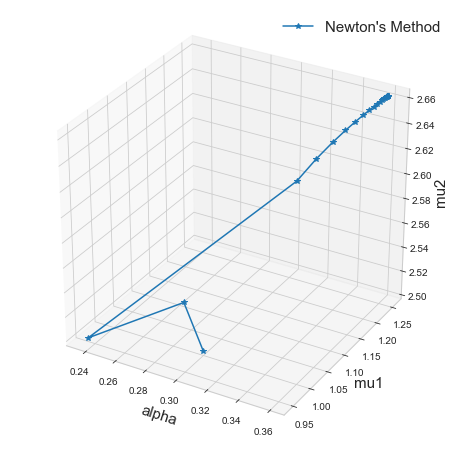

In [945]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams['legend.fontsize'] = 15

fig = plt.figure(figsize=(8,8))

ax = fig.gca(projection='3d')
(alpha0,mu10,mu20)
Alpha = [tup[0] for tup in val]
Mu1 = [tup[1] for tup in val]
Mu2 = [tup[2] for tup in val]

ax.plot(Alpha, Mu1, Mu2, '*-', label="Newton's Method")
ax.legend()

ax.set_xlabel('alpha', fontsize=15)
ax.set_ylabel('mu1', fontsize=15)
ax.set_zlabel('mu2', fontsize=15, rotation = 90)

#ax.set_xlim3d(0,1)

plt.show()

In [917]:
(alpha0,mu10,mu20)

(-13.2947040143, -4919.90210642, -4891.46572136)

In [921]:
Alpha

[0.3, 0.282017660607, 0.236066299045, 0.318472961184, 0.327591602189, 0.334952
938068, 0.34078084256, 0.345325868554, 0.348831764754, 0.351515316466, 0.35355
8545618, 0.355108666621, 0.356281860376, 0.357168357417, 0.357837502945, 0.358
342226748, 0.358722748047, 0.359009537883, 0.359225637056, 0.359388445554, 0.3
59511092255, 0.359603477625, 0.35967306468, 0.359725477564, 0.359764953871, 0.
359794686067, 0.359817079034, 0.359833944258, 0.359846646182, 0.359856212497, 
0.359863417234, 0.359868843366, 0.359872929963, 0.359876007706, 0.359878325648
, 0.359880071359, 0.359881386105, 0.359882376278, 0.359883122006, 0.3598836836
34, 0.359884106613, 0.35988442517, 0.359884665084]

In [897]:
x0

array([ 0.35988526,  1.25609486,  2.66340419])

In [297]:
np.sum(np.abs(x0Vec-2))

1046.0

In [263]:
(np.abs(x0-x1)+np.abs(y0-y1))

array([ 0.])

In [277]:
type(x0[0])

numpy.float64

In [311]:
g(x1,y1)

48.441600000000001

In [312]:
g(x0,y0)

48.4416

In [306]:
(np.array([x0,y0])[:,np.newaxis] + 10*prod).flatten()

array([-2.87022457,  2.89977543])